# **Project Overview:** Synthetic Data Generation Using TimeGAN
This project demonstrates the use of TimeGAN to generate synthetic time series data. The workflow involves several key steps to preprocess the data, train the model, and produce new, realistic samples.

# **Key Steps:**
**Data Preprocessing:**

The data is normalized using MinMaxScaler to ensure consistent scaling of features. Necessary transformations are applied to convert categorical values into numeric formats for model compatibility.

**Model Training:**

The preprocessed data is reshaped into sequences and fed into a TimeGAN model, which is configured with GRU layers. The model learns the temporal patterns of the data and is trained over 2,000 epochs to capture realistic sequences.

**Synthetic Data Generation:**

Once trained, the model generates synthetic time series samples. The generated data is then rescaled back to its original range and saved in CSV format for further analysis.

# **For First Dataset**

In [ ]:

!pip install tsgm

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tsgm
import json

# Load your JSON data from a file
with open('realtime_data_in_json-2.json', 'r') as file:
    json_data = json.load(file)

# Define mapping for currentStatus to numeric values
status_mapping = {
    'deployed': 0,
    'finished': 1,
    'terminated': 2,
    'servicing': 3,
    'starting': 4
}

# Extract relevant fields and convert currentStatus to numeric
data = []
for item in json_data:
    record = {
        'currentStatus': status_mapping.get(item.get("https://smartdatamodels.org/dataModel.Transportation/currentStatus", {}).get('value')),
        'speed': item.get("https://smartdatamodels.org/dataModel.Transportation/speed", {}).get('value'),
        'dateModified': item.get("https://smartdatamodels.org/dateModified", {}).get('value'),
        'location_latitude': item.get("location", {}).get("value", {}).get("coordinates", [None, None])[1],
        'location_longitude': item.get("location", {}).get("value", {}).get("coordinates", [None, None])[0],
        'type': item.get("type")
    }
    data.append(record)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert dateModified to datetime
df['dateModified'] = pd.to_datetime(df['dateModified'])

# Print DataFrame to check
print(df.head())

# Preprocess data
# The currentStatus field is already converted to numeric using status_mapping
df['type'] = df['type'].astype('category').cat.codes

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['currentStatus', 'speed', 'location_latitude', 'location_longitude']])

# Determine appropriate sequence length
total_samples = scaled_data.shape[0]
timesteps = 11
sequence_length = total_samples // timesteps

# Ensure that data size matches the reshape dimensions
if total_samples % timesteps != 0:
    print(f"Adjusting timesteps from {timesteps} to {total_samples // sequence_length}")
    timesteps = total_samples // sequence_length

# Reshape data into 3D array (samples, timesteps, features)
data_3d = scaled_data[:sequence_length * timesteps].reshape((sequence_length, timesteps, -1))

# Check data shape
print(f"Data shape: {data_3d.shape}")

# Train TimeGAN
model = tsgm.models.timeGAN.TimeGAN(
    seq_len=timesteps,    # Ensure this matches the number of timesteps
    module="gru",
    hidden_dim=24,
    n_features=scaled_data.shape[1],
    n_layers=3,
    batch_size=256,
    gamma=1.0,
)
model.compile()

model.fit(
    data=data_3d,
    epochs=2000,
)

# Generate synthetic data
n_samples = 1000  # Number of synthetic samples to generate
new_data = model.generate(n_samples=n_samples)

# Rescale synthetic data back to original range
new_data_rescaled = scaler.inverse_transform(new_data.reshape(-1, scaled_data.shape[1])).reshape(n_samples, timesteps, -1)

# Convert to DataFrame
flattened_data = new_data_rescaled.reshape(-1, new_data_rescaled.shape[-1])
columns = df[['currentStatus', 'speed', 'location_latitude', 'location_longitude']].columns
synthetic_df = pd.DataFrame(flattened_data, columns=columns)

# Save to CSV
synthetic_df.to_csv('synthetic_data3.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_data.csv'.")


ERROR: Operation cancelled by user


KeyboardInterrupt: 

# **For Second Dataset**

In [ ]:
!pip install tsgm

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tsgm
import json

# Load your JSON data
with open('devices-2.json', 'r') as file:
    json_data = json.load(file)

# Extract relevant fields
data = []
for item in json_data:
    record = {
        'speed': item.get('speed'),
        'latitude': item.get('latitude'),
        'longitude': item.get('longitude'),
        'route_type': item.get('route_type'),
        'time': item.get('time')
    }
    data.append(record)

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# Print DataFrame to check
print(df.head())

# Preprocess data
# Convert 'route_type' to category and then to numeric
df['route_type'] = df['route_type'].astype('category').cat.codes

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['speed', 'latitude', 'longitude', 'route_type']])

# Determine appropriate sequence length
total_samples = scaled_data.shape[0]
timesteps = 11
sequence_length = total_samples // timesteps

# Ensure that data size matches the reshape dimensions
if total_samples % timesteps != 0:
    print(f"Adjusting timesteps from {timesteps} to {total_samples // sequence_length}")
    timesteps = total_samples // sequence_length

# Reshape data into 3D array (samples, timesteps, features)
data_3d = scaled_data[:sequence_length * timesteps].reshape((sequence_length, timesteps, -1))

# Check data shape
print(f"Data shape: {data_3d.shape}")

# Train TimeGAN
model = tsgm.models.timeGAN.TimeGAN(
    seq_len=timesteps,
    module="gru",
    hidden_dim=24,
    n_features=scaled_data.shape[1],
    n_layers=3,
    batch_size=256,
    gamma=1.0,
)
model.compile()

model.fit(
    data=data_3d,
    epochs=2000,
)

# Generate synthetic data
n_samples = 1000
new_data = model.generate(n_samples=n_samples)

# Rescale synthetic data back to original range
new_data_rescaled = scaler.inverse_transform(new_data.reshape(-1, scaled_data.shape[1])).reshape(n_samples, timesteps, -1)

# Convert to DataFrame for saving
flattened_data = new_data_rescaled.reshape(-1, new_data_rescaled.shape[-1])
columns = df[['speed', 'latitude', 'longitude', 'route_type']].columns
synthetic_df = pd.DataFrame(flattened_data, columns=columns)

# Save to CSV
synthetic_df.to_csv('synthetic_data_devices2.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_data_devices2.csv'.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

INFO:models:Start Embedding Network Training
Autoencoder - training: 100%|██████████| 2000/2000 [00:36<00:00, 54.19it/s]
INFO:models:Finished Embedding Network Training
INFO:models:Start Training with Supervised Loss Only
Adversarial Supervised - training: 100%|██████████| 2000/2000 [00:29<00:00, 67.09it/s]
INFO:models:Finished Training with Supervised Loss Only
INFO:models:Start Joint Training
GAN with embedding - training: 100%|██████████| 2000/2000 [1:00:34<00:00,  1.82s/it]
INFO:models:Finished Joint Training
Synthetic data generation: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

Synthetic data generated and saved to 'synthetic_data_devices2.csv'.


# **Anomaly detection**

**OneClassSVM For The first Dataset**

In [ ]:
import json
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

#Load the JSON Data
with open('realtime_data_in_json-2.json') as file:
    data = json.load(file)

#Normalize and Flatten the JSON Structure
df = pd.json_normalize(data)

#Convert `currentStatus` to Numeric Values
status_mapping = {
    'deployed': 0,
    'finished': 1,
    'terminated': 2,
    'servicing': 3,
    'starting': 4
}
df['currentStatus'] = df['https://smartdatamodels.org/dataModel.Transportation/currentStatus.value'].map(status_mapping)

# Extract Relevant Features
df['speed'] = df['https://smartdatamodels.org/dataModel.Transportation/speed.value']
df['dateModified'] = pd.to_datetime(df['https://smartdatamodels.org/dateModified.value'])
df['source'] = df['https://smartdatamodels.org/source.value']
df['latitude'] = df['location.value.coordinates'].apply(lambda x: x[1])
df['longitude'] = df['location.value.coordinates'].apply(lambda x: x[0])
df['type'] = df['type']

# Drop the original columns after extracting necessary information
df.drop(columns=[
    'https://smartdatamodels.org/dataModel.Transportation/currentStatus.value',
    'https://smartdatamodels.org/dataModel.Transportation/speed.value',
    'https://smartdatamodels.org/dateModified.value',
    'https://smartdatamodels.org/source.value',
    'location.value.coordinates',
    'type'
], inplace=True)

# Select Features for One-Class SVM
features = ['currentStatus', 'speed', 'latitude', 'longitude']

# Prepare the feature matrix
X = df[features]

# Standardize the Feature Matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the One-Class SVM Model
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_scaled)

# Predict Anomalies on the Same Data
predictions = ocsvm.predict(X_scaled)

# -1 indicates an anomaly, 1 indicates normal
df['anomaly'] = predictions

# Display Results
print(df[['currentStatus', 'speed', 'latitude', 'longitude', 'anomaly']])


    currentStatus      speed   latitude  longitude  anomaly
0               3  33.840000  43.472200  -3.830987        1
1               3   4.068000  43.477991  -3.796646        1
2               3  28.440001  43.441336  -3.859188        1
3               3  31.896000  43.474539  -3.785425        1
4               3   0.000000  43.457490  -3.813027       -1
..            ...        ...        ...        ...      ...
83              3   0.000000  43.472057  -3.782203        1
84              3   0.000000  43.472004  -3.782136        1
85              3  30.204000  43.467860  -3.778477        1
86              3  14.292000  43.477881  -3.791048        1
87              3   5.508000  43.458491  -3.827174        1

[88 rows x 5 columns]


In [ ]:
import json
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load the JSON Data
with open('realtime_data_in_json-2.json') as file:
    data = json.load(file)

# Normalize and Flatten the JSON Structure
df = pd.json_normalize(data)

# Convert `currentStatus` to Numeric Values
status_mapping = {
    'deployed': 0,
    'finished': 1,
    'terminated': 2,
    'servicing': 3,
    'starting': 4
}
df['currentStatus'] = df['https://smartdatamodels.org/dataModel.Transportation/currentStatus.value'].map(status_mapping)

# Extract Relevant Features
df['speed'] = df['https://smartdatamodels.org/dataModel.Transportation/speed.value']
df['dateModified'] = pd.to_datetime(df['https://smartdatamodels.org/dateModified.value'])
df['source'] = df['https://smartdatamodels.org/source.value']
df['latitude'] = df['location.value.coordinates'].apply(lambda x: x[1])
df['longitude'] = df['location.value.coordinates'].apply(lambda x: x[0])
df['type'] = df['type']

# Drop the original columns after extracting necessary information
df.drop(columns=[
    'https://smartdatamodels.org/dataModel.Transportation/currentStatus.value',
    'https://smartdatamodels.org/dataModel.Transportation/speed.value',
    'https://smartdatamodels.org/dateModified.value',
    'https://smartdatamodels.org/source.value',
    'location.value.coordinates',
    'type'
], inplace=True)

# Select Features for One-Class SVM
features = ['currentStatus', 'speed', 'latitude', 'longitude']

# Prepare the feature matrix
X = df[features]

# Standardize the Feature Matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the One-Class SVM Model
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
ocsvm.fit(X_scaled)

# Load the Synthetic Data
syn_data = pd.read_csv('synthetic_data3.csv')

# Predict Anomalies on the Synthetic Data
syn_data_scaled = scaler.transform(syn_data)
syn_predictions = ocsvm.predict(syn_data_scaled)

# -1 indicates an anomaly, 1 indicates normal
syn_data['anomaly'] = syn_predictions

# Save the synthetic data with anomaly predictions to a CSV file
syn_data.to_csv('syn_data_with_anomalies.csv', index=False)


       currentStatus      speed   latitude  longitude  anomaly
0           2.999999  22.411257  43.444496  -3.828498       -1
1           2.999992   2.783614  43.461517  -3.784700       -1
2           2.999991  20.455435  43.442432  -3.857459        1
3           3.000000  22.975603  43.471546  -3.813773        1
4           2.999999   0.050938  43.461964  -3.810258        1
...              ...        ...        ...        ...      ...
10995       2.000257  15.248985  43.472733  -3.797516        1
10996       3.000000  17.497060  43.478010  -3.799895        1
10997       2.000012  13.547037  43.479053  -3.782401        1
10998       2.999996   3.721933  43.467876  -3.794057        1
10999       3.000000  42.183712  43.461555  -3.784893       -1

[11000 rows x 5 columns]


**Isolation Forest For Second Dataset**

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the real dataset from a JSON file
real_data = pd.read_json('Second Dataset.json')

# Select relevant numeric fields for anomaly detection
features = ['speed', 'latitude', 'longitude','route_type']
real_data_subset = real_data[features]

# Handle missing values if necessary
real_data_subset.fillna(0, inplace=True)

# Check the structure of the real dataset after preprocessing
print(real_data_subset.head())

# Train the Isolation Forest model on the real data
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(real_data_subset)

# Load the generated dataset
generated_data = pd.read_csv('synthetic_data_for_second_dataset.csv')

# Define the features you want to use (adjust as necessary)
features = ['speed', 'latitude', 'longitude', 'route_type']

# Preprocess the generated dataset (use the same feature set)
generated_data_subset = generated_data[features]
generated_data_subset.fillna(0, inplace=True)

# Check the structure of the generated dataset
print(generated_data_subset.head())

# Predict anomalies on the generated dataset
anomaly_predictions = isolation_forest.predict(generated_data_subset)

# -1 indicates an anomaly, 1 indicates a normal point
generated_data['anomaly'] = anomaly_predictions

# Display the data with anomalies marked
print(generated_data.head())

# Save the dataset with anomaly labels to a CSV file
generated_data.to_csv('generated_data_with_anomalies.csv', index=False)

print("Anomaly detection results saved to 'generated_data_with_anomalies.csv'")




<ipython-input-2-fb6d863c09ca>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data_subset.fillna(0, inplace=True)


   speed   latitude  longitude  route_type
0     12  50.245343  28.640510          11
1      0  50.267743  28.697708          11
2     35  50.295380  28.657203          11
3     11  50.240613  28.691613          11
4      0  50.267643  28.648608          11
       speed   latitude  longitude  route_type
0   0.809543  50.264850  28.722810    0.983916
1   7.284949  50.250230  28.685196    0.705750
2  27.542025  50.264862  28.697268    1.114516
3   0.133841  50.275063  28.638817    1.210884
4  38.313490  50.287243  28.610088    1.041150
       speed   latitude  longitude  route_type  anomaly
0   0.809543  50.264850  28.722810    0.983916        1
1   7.284949  50.250230  28.685196    0.705750        1
2  27.542025  50.264862  28.697268    1.114516        1
3   0.133841  50.275063  28.638817    1.210884        1
4  38.313490  50.287243  28.610088    1.041150       -1
Anomaly detection results saved to 'generated_data_with_anomalies.csv'


# **Generate Maps To Validate Location Acurracy**

In [ ]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('synthetic_data3.csv')

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Add markers for each data point
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Speed: {row['speed']}, Status: {row['currentStatus']}"
    ).add_to(m)

# Save the map as an HTML file
m.save('locations_map_real.html')


SyntaxError: cannot assign to literal (<ipython-input-11-1acbc3415b43>, line 11)

In [ ]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('synthetic_data3.csv')

# Randomly sample 100 rows
df_sampled = df.sample(n=100, random_state=1)  # Set random_state for reproducibility

# Create a base map
m = folium.Map(location=[df_sampled['latitude'].mean(), df_sampled['longitude'].mean()], zoom_start=12)

# Add markers for each sampled data point
for _, row in df_sampled.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Speed: {row['speed']}, Status: {row['currentStatus']}"
    ).add_to(m)

# Save the map as an HTML file
m.save('locations_map_sampled.html')


In [ ]:
import pandas as pd
import folium

# Load the CSV file into a DataFrame
df = pd.read_csv('synthetic_data3.csv')

# Select the first 10 rows
df_first_10 = df.head(10)

# Create a base map
m = folium.Map(location=[df_first_10['latitude'].mean(), df_first_10['longitude'].mean()], zoom_start=12)

# Add markers for each data point
for _, row in df_first_10.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Speed: {row['speed']}, Status: {row['currentStatus']}"
    ).add_to(m)

# Save the map as an HTML file
m.save('locations_map_first_10.html')


In [ ]:
import pandas as pd
import json

# Load JSON data from the file
with open('realtime_data_in_json-2.json', 'r') as file:
    json_data = json.load(file)

# Parse JSON data and extract fields
data = []
for entry in json_data:
    current_status = entry.get("https://smartdatamodels.org/dataModel.Transportation/currentStatus", {}).get("value", None)
    speed = entry.get("https://smartdatamodels.org/dataModel.Transportation/speed", {}).get("value", None)
    coordinates = entry.get("location", {}).get("value", {}).get("coordinates", [None, None])
    latitude = coordinates[1]
    longitude = coordinates[0]

    data.append([current_status, speed, latitude, longitude])

# Create DataFrame and save to CSV
df = pd.DataFrame(data, columns=['currentStatus', 'speed', 'latitude', 'longitude'])
df.to_csv('output.csv', index=False)


In [3]:
import pandas as pd
import folium

# Load the dataset
df = pd.read_csv('generated_data_with_anomalies.csv')

# Initialize a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

# Plot the first 15 entries
for i in range(min(15, len(df))):
    row = df.iloc[i]
    color = 'red' if row['anomaly'] == -1 else 'blue'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Speed: {row['speed']}, Route Type: {row['route_type']}, Anomaly: {row['anomaly']}"
    ).add_to(my_map)

# Save the map to an HTML file
my_map.save('map.html')


In [4]:

# Load the dataset
df = pd.read_csv('generated_data_with_anomalies.csv')

# Sample 30 random entries
sampled_df = df.sample(n=30, random_state=42)

# Initialize a map centered around the mean latitude and longitude of the sampled data
map_center = [sampled_df['latitude'].mean(), sampled_df['longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)

# Plot the sampled entries
for _, row in sampled_df.iterrows():
    color = 'red' if row['anomaly'] == -1 else 'blue'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Speed: {row['speed']}, Route Type: {row['route_type']}, Anomaly: {row['anomaly']}"
    ).add_to(my_map)

# Save the map to an HTML file
my_map.save('map_random_30.html')



***Isolation Forest Shows Better results***

# **Visualization (Density)**

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the real dataset from the JSON file
with open('Second Dataset.json') as f:
    real_data = json.load(f)

# Convert the real data to a pandas DataFrame
real_df = pd.DataFrame(real_data)

# Extract relevant columns from the real dataset
real_df = real_df[['speed', 'latitude', 'longitude', 'route_type']]

# Load the synthetic dataset from the CSV file
syn_df = pd.read_csv('synthetic_data_for_second_dataset.csv')

# Ensure both DataFrames have the same column names
syn_df.columns = ['speed', 'latitude', 'longitude', 'route_type']

# Normalize the route_type column in both datasets
real_df['route_type'] = real_df['route_type'] / real_df['route_type'].max()
syn_df['route_type'] = syn_df['route_type'] / syn_df['route_type'].max()

# Make sure to randomly sample the synthetic data to match the real data length
syn_df_sampled = syn_df.sample(n=len(real_df), random_state=42)


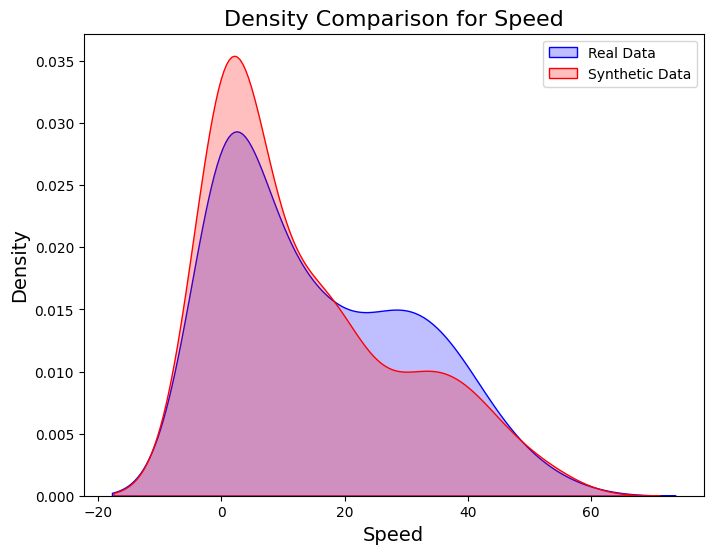

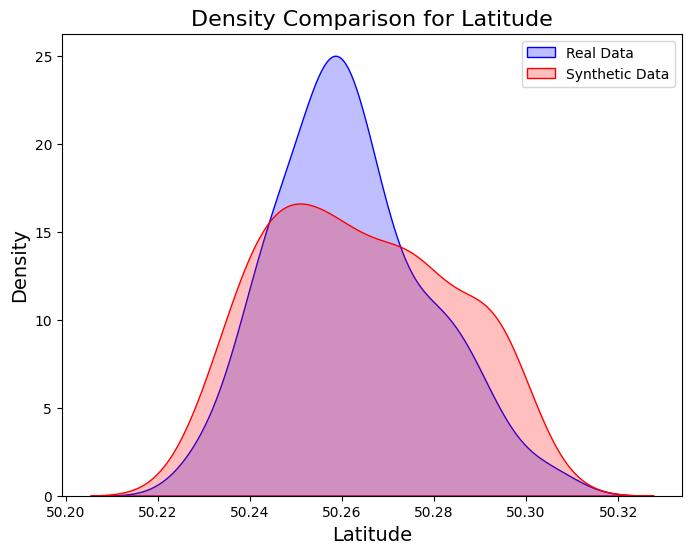

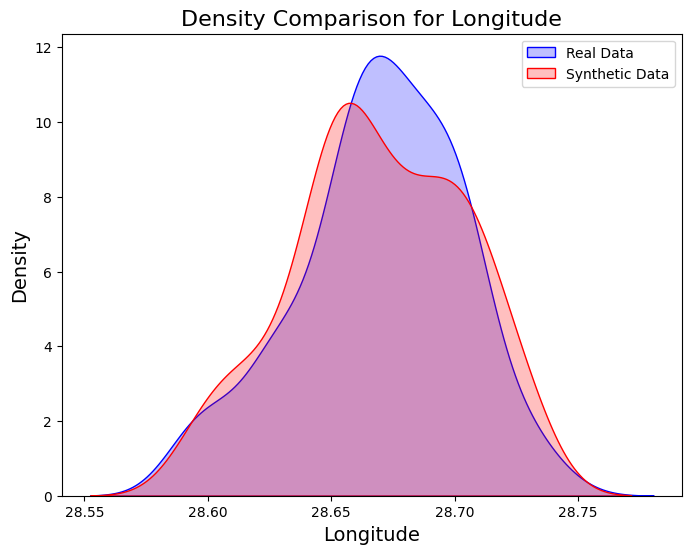

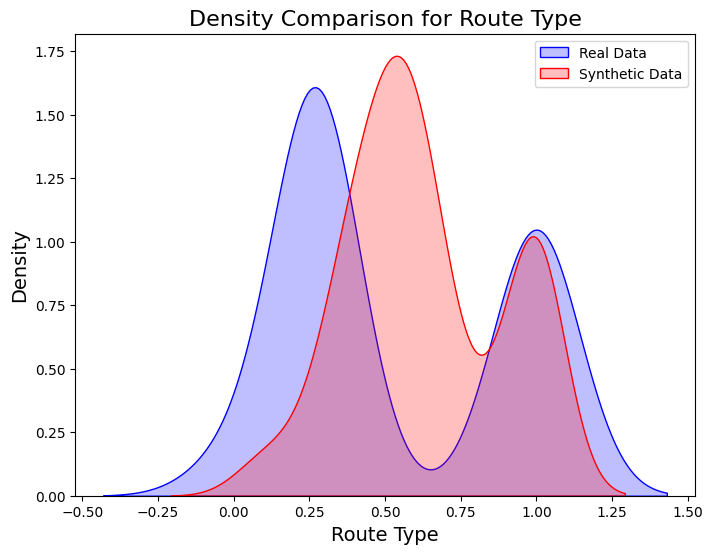

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot KDE comparison for real and synthetic data
def plot_density_comparison(real_data, syn_data, feature_name):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(real_data, label='Real Data', color='blue', fill=True)

    sns.kdeplot(syn_data, label='Synthetic Data', color='red', fill=True)

    plt.title(f'Density Comparison for {feature_name}', fontsize=16)
    plt.xlabel(f'{feature_name}', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    plt.legend()
    plt.show()


syn_df_sampled = syn_df.sample(n=len(real_df), random_state=42)

# Compare densities for 'speed', 'latitude', and 'longitude'
plot_density_comparison(real_df['speed'], syn_df_sampled['speed'], 'Speed')
plot_density_comparison(real_df['latitude'], syn_df_sampled['latitude'], 'Latitude')
plot_density_comparison(real_df['longitude'], syn_df_sampled['longitude'], 'Longitude')
plot_density_comparison(real_df['route_type'], syn_df_sampled['route_type'], 'Route Type')


In [ ]:
print(real_data[:5])

[{'imei': '355234055264044', 'gov_number': '#001', 'route_id': '86F1FF592156451DB573B0BEE5A90612', 'route_short_name': '15А', 'route_long_name': 'Тр. № 15А Гідропарк - Вокзал 2021', 'route_type': 11, 'time': '2024-02-23 11:25:04', 'longitude': 28.64051, 'latitude': 50.245343, 'satellites': 15, 'speed': 12, 'spec': ['dis', '', '', '']}, {'imei': '351513052254379', 'gov_number': '#002', 'route_id': '4E48258FB9E669EECC7B73146FBDB986', 'route_short_name': '1Б', 'route_long_name': 'Тр. № 01 (Б) Залізничний вокзал - Космонавтів - Залізничний вокзал', 'route_type': 11, 'time': '2024-02-23 11:25:06', 'longitude': 28.697708, 'latitude': 50.267743, 'satellites': 9, 'speed': 0, 'spec': ['dis', '', '', '']}, {'imei': '355234055272997', 'gov_number': '#004', 'route_id': '9DF62F9F866155CCFDCDA6614F49AA25', 'route_short_name': '4', 'route_long_name': 'Тр. № 04 Крошня - Залізничний вокзал 2022', 'route_type': 11, 'time': '2024-02-23 11:24:58', 'longitude': 28.657203, 'latitude': 50.29538, 'satellites'